In [4]:
# --- IMPORT LIBRARIES --- #

import os
import array
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
import matplotlib.offsetbox as offsetbox
import networkx as nx
from matplotlib import cm
from collections import OrderedDict
cmaps = OrderedDict()
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import csv

In [5]:
### --- THINGS YOU NEED TO CHANGE --- ###

planet_name = 'ModernEarthY&D99' #name your planetary body!

# Do you want to print out text files or save plots? 'yes' or 'no'
print_metrics = 'no'
print_lists = 'no'
drawfinalnetwork = 'no'
degree_cdf = 'no'
print_communities = 'no'
color_by_community = 'no'
color_by_louvain = 'no'
louvain_ordered_list = 'no'

In [6]:
### --- BANK --- ###

if 'ModernEarthY&D99' in planet_name:
    num_species = 274
    num_rxn = 562

if planet_name == 'Titan2016':
    num_species = 81
    num_rxn = 1860

if planet_name == 'ModernMars':
    num_species = 28
    num_rxn = 175

if planet_name == 'ModernEarthSanders':
    num_species = 89
    num_rxn = 1026

if planet_name == 'Venus':
    num_species = 56
    num_rxn = 539

if planet_name == 'EarlyMars':
    num_species = 61
    num_rxn = 544

if 'Jupiter' in planet_name :
    num_species = 125
    num_rxn = 990

if planet_name == 'Pluto':
    num_species = 82
    num_rxn = 2027

In [9]:
### --- DEFINE PATH AND OPEN FILE --- ###

data_file = os.path.join('data',planet_name+'.edited.out') #define a path to the file we want to open

print(F'Path to the data file: {data_file}') #print to check

outfile = open(data_file, 'r') #create a pointer file 'outfile' that opens the file in the path specified

data = outfile.readlines() #read in every line of the file and saves every separate line as an element in a list

outfile.close()

#just for fun, figure out how many lines are in the file
number_of_lines = len(data)
print(F'The data file has {number_of_lines} lines')

Path to the data file: data/ModernEarthY&D99.edited.out
The data file has 839 lines


In [10]:
# --- FIND THE LINE NUMBER WHERE THE SPECIES LIST STARTS --- #

for counter, value in enumerate(data):
    
    if 'SPECIES:' in value:
        
        species_index = counter #the line number where 'SPECIES:' exists
        
        print(F'Species list starts on line: {species_index}')

Species list starts on line: 0


In [11]:
# --- FIND THE LINE NUMBER WHERE THE REACTION LIST STARTS --- #

rxn_index = [] #anticipate multiple places where 'REACTIONS:' occurs

for counter, value in enumerate(data):
    
    if 'REACTIONS:' in value:
        
        rxn_index.append(counter) #make a list of all the line numbers where 'REACTIONS:' exists
        
rxn_index = rxn_index[0] #just take the first occurence

print(F'Reaction list starts on line: {rxn_index}')

Reaction list starts on line: 276


In [12]:
# --- MAKE A LIST OF SPECIES --- #

species_names = [] #initialize species list

#loop through lines in the data
for line in data:
    
    # extract just the species list
    species_data = data[species_index +1 : species_index + num_species + 1]
    
#loop over the species
for i in range(0, num_species):
    
    globals()['species_split%s' % i] = species_data[i].split() #split each line
     
    species_names.append(globals()['species_split%s' % i][1]) #make a list of just the species names

#get rid of a species you don't like!    
remove_list = [] #name species you want to remove

for item in remove_list:
    
    species_names.remove(item) #remove those species from species_names
    
num_species = num_species - len(remove_list) #reduce num_species by length of remove_list
    
print(F'The {num_species} species in this model are: {species_names}')

The 274 species in this model are: ['O2', 'O', 'O(1D)', 'O3', 'HO2', 'OH', 'H2O', 'H', 'H2', 'H2O2', 'NO', 'N', 'NO2', 'NO3', 'N2O', 'N2', 'N2O5', 'HNO2', 'HNO3', 'HO2NO2', 'CH3O2NO2', 'CH3O2', 'NH3', 'NH2', 'CL2', 'CL', 'CLO', 'CLOO', 'OCLO', 'CLO3', 'CL2O', 'CL2O2', 'CL2O3', 'CLNO', 'CLNO2', 'CLONO', 'CLNO3', 'HCL', 'HOCL', 'CH3CL', 'CH3', 'CH2FCL', 'CHFCL2', 'CFCL2', 'CHF2CL', 'CF2CL', 'CCL4', 'CCL3', 'CFCL3', 'CF2CL2', 'CH3CCL3', 'CH3CFCL2', 'CH3CF2CL', 'C2CL3F3', 'C2CL2F4', 'CF3CHCL2', 'CF3CHFCL', 'CF3CCL3', 'CF3CFCL2', 'CF3CF2CHCL2', 'CF2CLCF2CHFCL', 'CHCLO', 'HCO', 'COCL2', 'CO', 'COFCL', 'HF', 'F', 'CF4', 'CF3', 'C2F6', 'COF2', 'SF6', 'BR2', 'BR', 'BRO', 'BRNO2', 'BRNO3', 'HBR', 'HOBR', 'CH3BR', 'CHBR3', 'BRCL', 'CF2CLBR', 'CF2BR2', 'CF3BR', 'C2F4BR2', 'CH4', 'CO2', 'H2CO', 'CH3OOH', 'CH3O', 'HCN', 'CN', 'CH3CN', 'SO2', 'SO', 'H2S', 'SH', 'OCS', 'S', 'C2HO', 'O2(1D)', 'O2(1S)', 'HD', 'HONO', 'NH', 'C2H2', 'CH3CHO', 'CH3CO', 'C2H4', 'C3H6', 'CH3D', 'CH3OH', 'HC(O)OH', 'C2H6', 'C

In [13]:
# --- MAKE A LIST OF REACTIONS --- #

rxn = [] #initialize reactions list

#loop through lines in the data
for line in data:
    
    rxn_data = data[rxn_index +1 : rxn_index + num_rxn + 1] # extract just the reaction list
    
#loop over the species
for i in range(0, num_rxn):
    
    #split each reaction on the equals sign, creating subrates and products
    globals()['rxn_split%s' % i] = rxn_data[i].split('=')
    globals()['rxn_substrates%s' % i] = globals()['rxn_split%s' % i][0]
    globals()['rxn_products%s' % i] = globals()['rxn_split%s' % i][1]
    
    #split substrates into words
    globals()['rxn_substrates_split%s' % i] = globals()['rxn_substrates%s' % i].split()
    
    #split products into words
    globals()['rxn_products_split%s' % i] = globals()['rxn_products%s' % i].split()
    
print(F'Substrates of the first reaction:')
print(rxn_substrates0)
print(F'Products of the first reaction:')
print(rxn_products0)
print(F'Substrates of the final reaction:')
print(globals()['rxn_substrates_split%s' % i])
print(F'Products of the final reaction:')
print(globals()['rxn_products_split%s' % i])

Substrates of the first reaction:
O2 
Products of the first reaction:
 2 O

Substrates of the final reaction:
['NAOH', '+', 'CO2']
Products of the final reaction:
['NAHCO3']


In [14]:
# --- MAKE NEAREST NEIGHBOR LISTS --- #

# --- COUNT HOW MANY DEGREES K EACH SPECIES HAS --- #

# --- COUNT HOW MANY EDGES E THE NETWORK HAS --- #

K_tot = 0 #total number of degrees K in network (sum of K(mol1)'s): initialize at zero
K = [] #initialize list of K(mol1)
E_tot = 0 #total number of edges E in network: initialize E counter at zero
C = [] #initialize list of clustering coefficients C

#loop over target molecule
for mol1 in range(len(species_names)):
    
    #define degree counters for target molecule
    globals()['K%s' % mol1] = 0
    
    #define a list of nearest neighbors for target molecule
    globals()['NN_%s' % species_names[mol1]] = []
    
    #print(species_names[substrate])
    
    #loop over all pairing molecules
    for mol2 in range(len(species_names)):
        
        #print(F'{species_names[substrate]} - {species_names[product]}')
        
        degree_true = 0 #initialize "degreetrue" as zero for any combo of mol1 & mol2
        new_edge_true = 0 #initialize "edgedrue" as zero for any combo of mol1 & mol2
        
        #loop over all reactions
        for i in range (num_rxn):
            
            #note a new DEGREE for mol1 IF: 
            #mol1 is a substrate and mol2 is a product in reaction i, or the other way around
            if (mol1 != mol2) and ((species_names[mol1] in globals()['rxn_substrates_split%s' % i] and species_names[mol2] in globals()['rxn_products_split%s' % i]) or (species_names[mol1] in globals()['rxn_products_split%s' % i] and species_names[mol2] in globals()['rxn_substrates_split%s' % i])):
            
                degree_true = degree_true + 1 #make "degreetrue" positive
            
            #note a new EDGE for the network IF:
            #mol1 is a substrate and mol2 is a product in reaction i, or the other way around
            #require mol1 <= mol2 so that we don't double count links
            if (mol1 < mol2) and ((species_names[mol1] in globals()['rxn_substrates_split%s' % i] and species_names[mol2] in globals()['rxn_products_split%s' % i]) or (species_names[mol1] in globals()['rxn_products_split%s' % i] and species_names[mol2] in globals()['rxn_substrates_split%s' % i])):
                
                new_edge_true = new_edge_true + 1 #make "edgetrue" positive
            
        #if degreetrue is positive (there was at least 1 reaction with those substrates and products), move K counter up for mol1
        if degree_true > 0:
                
            globals()['K%s' % mol1] = globals()['K%s' % mol1] + 1 #add 1 to K(mol1)
            
            K_tot = K_tot + 1 #advance total number of degrees K_tot
            
            #add mol2 to mol1's list of nearest neighbors
            globals()['NN_%s' % species_names[mol1]].append(species_names[mol2])
            
        if new_edge_true > 0:
            
            E_tot = E_tot + 1 #advance total number of edges E_tot
          
    K.append(globals()['K%s' % mol1]) #add this K(mol1) to our list of K's
    
# --- CALCULATE <K> --- #

K_avg = K_tot/num_species
    
### --- COMPUTE CLUSTERING COEFFICIENTS --- ###

#loop over target molecule
for mol1 in range(len(species_names)):
    
    NN_links = 0 #initialize number of nearest neightbor links as 0
    
    #if mol1 has only 0 or 1 degrees (nearest neighbors)
    if K[mol1] == 0 or K[mol1] == 1:
    
        globals()['C%s' % mol1] = 0 #set its clustering coeff = 0
    
    else:
        
        #loop over all nearest neighbors of mol1
        for nn in range (len(globals()['NN_%s' % species_names[mol1]])):
            
            #loop over nearest neighbors of mol1 again, but only those after nn
            for mm in range (nn,len(globals()['NN_%s' % species_names[mol1]])):
                
                # TRICKY PROCEDURE:
                # nn and mm are nearest neighbors of mol1
                # ask if mm is in nn's nearest neighbor list
                
                #the name of species mm
                lookfor = globals()['NN_%s' % species_names[mol1]][mm]
                
                #list of nearest neighbors of mol1:
                #     globals()['NN_%s' % species_names[mol1]]
                #the nearest neighbor nn that we want to find the nearest neighbors of:
                #     globals()['NN_%s' % species_names[mol1]][nn]
                #the list of nearest neighbors of nearest neighbor nn:
                lookhere = globals()['NN_%s' % globals()['NN_%s' % species_names[mol1]][nn]]
                
                #ask if mm is in nn's nearest neighbor list
                if lookfor in lookhere:
                
                #old version (didn't break things down into 'lookfor' and 'lookhere')
                #if globals()['NN_%s' % species_names[mol1]][mm] in globals()['NN_%s' % globals()['NN_%s' % species_names[mol1]][nn]]:
                
                    #get rid of doubles and self-links *think carefully about this*
                    
                    NN_links = NN_links + 1 #if so, add 1 to the number of nearest neighbor links
        
        # 1. identify nearest neighbors
        # 2. query: do the nearest neighbors have links to each other?
        # 3. how many? name this nn_links[mol1]
                          
        globals()['C%s' % mol1] = 2*NN_links/(K[mol1]*(K[mol1]-1)) # calculate the clustering coefficient for mol1
        
    C.append(globals()['C%s' % mol1]) #add this C(mol1) to our list of C's
    
C_avg = sum(C)/len(K) #calculate the network's average clustering coefficient
        
print(F'K_tot = {K_tot}')
print(F'Check: Sum of all Ki = {sum(K)}')
print(F'Check: Total number of edges = {E_tot} (should be half K_tot)')
print(F'List of all {len(K)} Ki = {K}')
print(F'List of all {len(C)} Ci = {C}')
print(F'<K> = {K_avg}')
print(F'<C> = {C_avg}')


K_tot = 1470
Check: Sum of all Ki = 1470
Check: Total number of edges = 735 (should be half K_tot)
List of all 274 Ki = [50, 40, 15, 25, 26, 84, 60, 23, 9, 5, 37, 5, 46, 18, 7, 6, 5, 4, 12, 4, 2, 6, 4, 3, 8, 71, 25, 10, 10, 4, 4, 3, 3, 3, 3, 3, 6, 43, 7, 5, 12, 2, 4, 5, 4, 6, 2, 5, 2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 2, 10, 0, 7, 16, 2, 8, 1, 0, 0, 3, 24, 13, 2, 2, 10, 4, 5, 2, 5, 2, 0, 2, 0, 8, 6, 7, 4, 8, 2, 2, 2, 13, 14, 6, 14, 7, 6, 2, 2, 0, 0, 5, 0, 2, 5, 3, 4, 0, 0, 2, 0, 4, 7, 3, 3, 0, 0, 2, 2, 2, 0, 2, 6, 9, 2, 1, 4, 7, 5, 3, 3, 3, 3, 2, 4, 12, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 5, 2, 4, 3, 4, 3, 2, 2, 0, 3, 0, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 3, 4, 9, 10, 5, 3, 2, 2, 2, 3, 7, 2, 5, 7, 2, 8, 6, 4, 0, 3, 5, 2, 2, 2, 2, 4, 4, 0, 2, 0, 2, 2, 0, 0, 9, 13, 5, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
List of all 274 Ci = [0.1436

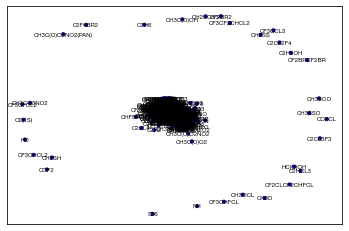

In [16]:
# --- MAKE RIDICULOGRAM --- #

G = nx.Graph()

for mol1 in range(len(species_names)):

    G.add_node(species_names[mol1])

for mol1 in range(len(species_names)):
    
    for mol2 in range(len(globals()['NN_%s' % species_names[mol1]])):
    
        G.add_edge(species_names[mol1],globals()['NN_%s' % species_names[mol1]][mol2])

#draw the graph
nx.draw_networkx(G, with_labels=True, node_size=10, width=0.1, edge_color='gray', node_color=K, cmap='plasma',\
                 vmin=min(K), vmax=max(K), font_family='Helvetica Neue', font_size=6, font_weight='book')

The connected species in this network are: ['O2', 'O', 'O(1D)', 'O3', 'HO2', 'OH', 'H2O', 'H', 'H2', 'H2O2', 'NO', 'N', 'NO2', 'NO3', 'N2O', 'N2', 'N2O5', 'HNO2', 'HNO3', 'HO2NO2', 'CH3O2NO2', 'CH3O2', 'NH3', 'NH2', 'CL2', 'CL', 'CLO', 'CLOO', 'OCLO', 'CLO3', 'CL2O', 'CL2O2', 'CL2O3', 'CLNO', 'CLNO2', 'CLONO', 'CLNO3', 'HCL', 'HOCL', 'CH3CL', 'CH3', 'CH2FCL', 'CHFCL2', 'CFCL2', 'CHF2CL', 'CF2CL', 'CCL4', 'CCL3', 'CFCL3', 'CF2CL2', 'CH3CCL3', 'CH3CFCL2', 'CH3CF2CL', 'CHCLO', 'HCO', 'COCL2', 'CO', 'HF', 'F', 'CF4', 'CF3', 'C2F6', 'BR2', 'BR', 'BRO', 'BRNO2', 'BRNO3', 'HBR', 'HOBR', 'CH3BR', 'CHBR3', 'BRCL', 'CF2CLBR', 'CF3BR', 'CH4', 'CO2', 'H2CO', 'CH3OOH', 'CH3O', 'HCN', 'CN', 'CH3CN', 'SO2', 'SO', 'H2S', 'SH', 'OCS', 'S', 'C2HO', 'O2(1D)', 'HONO', 'C2H2', 'CH3CHO', 'CH3CO', 'C2H4', 'CH3OH', 'C2H6', 'C2H5', 'C3H8', 'C3H7', 'CH3C(O)CH3', 'CH3C(O)CH2', 'CH3ONO2', 'C2H5ONO2', 'CH2O', 'C2H5O2', 'C2H5OOH', 'CH3C(O)O2', 'CH2OH', 'FO', 'FO2', 'CH3F', 'CH2F', 'CH2F2', 'CHF2', 'CHF3', 'CF3OH', 

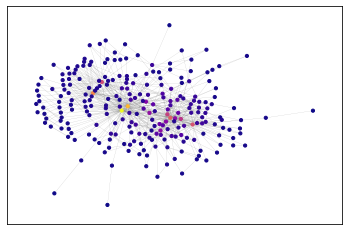

In [17]:
# --- REMOVE ISOLATES --- #

#isolates are nodes with k=0 (disconnected nodes)

list(nx.isolates(G)) #list isolates
G.remove_nodes_from(list(nx.isolates(G))) #remove isolates
species_names = [node for (node, val) in G.degree()] #create list of degrees without isolates
num_nodes = G.number_of_nodes() #number of nodes in network without isolates
num_edges = G.number_of_edges() #number of edges in network without isolates
K = [val for (node, val) in G.degree()] #create list of degrees without isolates
K_avg = sum([val for (node, val) in G.degree()]) / float(num_nodes) #recalculate average degree without isolates

print(F'The connected species in this network are: {species_names}')
print(F'The new Ks in this network are: {K}')
print(F'The number of species in this network are: {num_nodes}')
print(F'The number of edges in this network are: {num_edges}') 
print(F'The average K of this network is: {K_avg}') 

#overwrite the graph without isolates
nx.draw_networkx(G, with_labels=False, node_size=10, width=0.1, edge_color='gray', node_color=K, cmap='plasma',\
                 vmin=min(K), vmax=max(K), font_family='Helvetica Neue', font_size=3, font_weight='book')

In [20]:
# --- WRITE NETRWORK METRICS INTO OUTPUT FILE --- #

if print_metrics == 'yes':

    # this opens a new file for writing
    outfile = open(planet_name+'.txt','w+') # make a new file and open it for writing

    # write various network metrics
    outfile.write(F'{planet_name}\n\
    nodes = {num_nodes} \tedges = {num_edges} \n\
    <K> = {K_avg} \taverage degree  \n\
    <T> = {nx.transitivity(G)} \ttransitivity \n\
    <C> = {nx.average_clustering(G)} \taverage clustering \n\
    <L> = {nx.average_shortest_path_length(G)} \taverage shortest path\n\
    r = {nx.degree_assortativity_coefficient(G)} \tdegree assortativity')

    #close output file
    outfile.close()

In [21]:
### --- CALCULATE CENTRALITY MEASURES --- ###

# DEGREE CENTRALITY
# (fraction of nodes a node is connected to)
dc = nx.degree_centrality(G)
dc_list = []
for name in species_names:
    dc_list.append(dc[name])

    
    
# EIGENVECTOR CENTRALITY
# (centrality for a node based on the centrality of its neighbors)
ec = nx.eigenvector_centrality(G)
ec_list = []
for name in species_names:
    ec_list.append(ec[name])
 
    
    
# CLOSENESS CENTRALITY
# (reciprocal of the average shortest path distance to node)
cc = nx.closeness_centrality(G)
cc_list = []
for name in species_names:
    cc_list.append(cc[name])        



# BETWEENNESS CENTRALITY
# (fraction of shortest paths that pass through node)
bc = nx.betweenness_centrality(G)
bc_list = []
for name in species_names:
    bc_list.append(bc[name])      

    
# COMMUNICABILITY BETWEENNESS CENTRALITY
# (the number of walks connecting every pair of nodes as the basis of a betweenness centrality measure)
cbc = nx.communicability_betweenness_centrality(G)
cbc_list = []
for name in species_names:
    cbc_list.append(cbc[name])
    

    
# CURRENT FLOW CLOSENESS (INFORMATION) CENTRALITY
# (variant of closeness centrality based on effective resistance between nodes in a network)
cfcc = nx.current_flow_closeness_centrality(G)
cfcc_list = []
for name in species_names:
    cfcc_list.append(cfcc[name])    

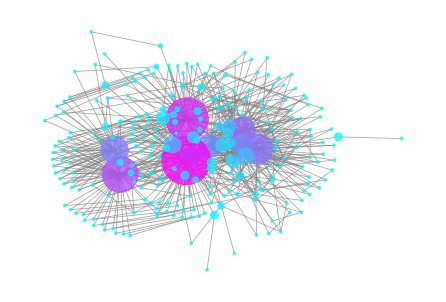

In [22]:
# --- CREATE FINAL NETWORK GRAPH --- #

#node color = degree
#node size = centrality

# Define node size array
size = []
scaling_factor = 7200
size_lowerbound = 0.001

for number in bc_list:
    if number >= size_lowerbound:
        size.append(number*scaling_factor)
    else:
        size.append(size_lowerbound*scaling_factor)

# Draw and save graph (overwrite old graph)
# (width = 0.3 for paper figures)

nx.draw_kamada_kawai(G, with_labels=False, alpha=0.75, node_size=size,\
                     width=0.75, edge_color='gray', node_color=K, cmap='cool', vmin=min(K), vmax=max(K),\
                     font_family='Helvetica Neue', font_size=4, font_weight='book')

if drawfinalnetwork == 'yes':
    plt.savefig(planet_name+' network.png', dpi=300, transparent=True)

In [23]:
# --- OUTPUT NODE LIST & EDGE LIST --- #

if print_lists == 'yes':

    #write edgelist
    nx.write_edgelist(G, planet_name+'_edgelist.txt')

    # write nodelist
    outfile = open(planet_name+'_nodelist.txt','w+') # make a new file and open it for writing
    for species in species_names:
        outfile.write(F'{ species}\n')
    outfile.close()